In [5]:
# 데이터를 수집합니다.
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")
# 수집된 데이터 샘플을 확인합니다.
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [6]:
# 현재 데이터에서 포지션의 개수를 확인한다
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

Text(0.5,1,'AST and 2P in 2d plane')

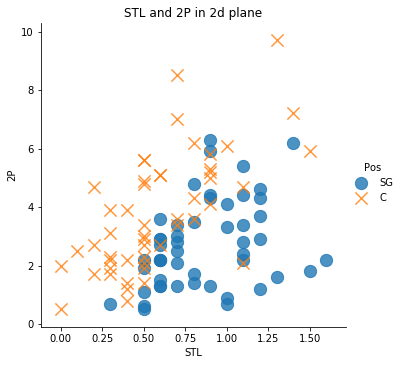

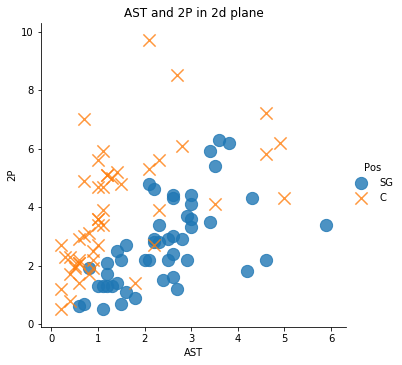

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('STL and 2P in 2d plane')

# 어시스트,2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
          hue="Pos") # 예측값
# 타이틀
plt.title('AST and 2P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

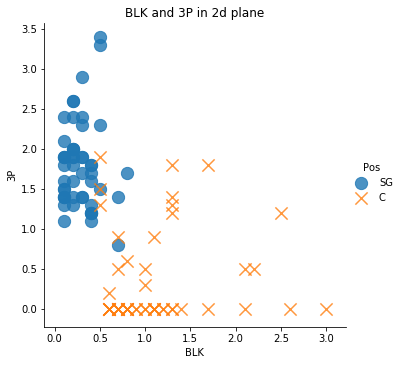

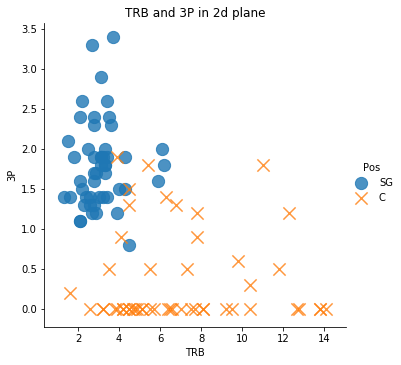

In [11]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('BLK and 3P in 2d plane')

# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False, 
           scatter_kws={"s":150},
          markers=["o", "x"],
          hue="Pos")
# 타이틀
plt.title('TRB and 3P in 2d plane')

In [12]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다.
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [13]:
# 사이킷런의 train_test_split을 사용하면 코드 한 줄로 손쉽게 데이터를 나눌 수 있습니다.
from sklearn.model_selection import train_test_split
# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [18]:
train.shape[0]

80

In [19]:
test.shape[0]

20

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                                            scoring='accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.8857142857142858,
 0.8728174603174603,
 0.8746031746031747,
 0.8621031746031746,
 0.8746031746031747,
 0.8621031746031746,
 0.8621031746031746,
 0.8621031746031746,
 0.8621031746031746,
 0.8746031746031747,
 0.8746031746031747,
 0.8746031746031747,
 0.8603174603174603,
 0.8478174603174603,
 0.8478174603174603,
 0.8255952380952379,
 0.8255952380952379,
 0.813095238095238,
 0.7988095238095237]

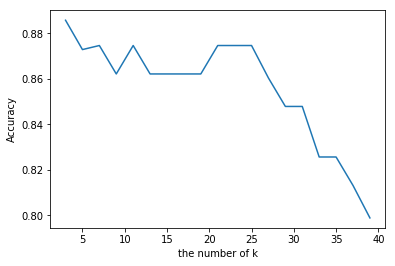

In [23]:
# k에 딸느 정확도를 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# 가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# 학습에 사용될 속성을 지정
x_train = train[['3P', 'BLK', 'TRB']]
# 선수 포지션을 예측할 값으로 지정
y_train = train[['Pos']]

# knn 모델 학습
knn.fit(x_train, y_train.values.ravel())

# 테스트 데이터에서 분류를 위해 사용도리 속성을 지정
x_test = test[['3P', 'BLK', 'TRB']]

# 선수 포지션에 대한 정답을 지정
y_test = test[['Pos']]

# 테스트 시작
pred = knn.predict(x_test)

# 모델 예측 정확도(accuracy) 출력
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95


In [28]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
